### Table of Contents
1. Imports
2. Wages data
    * Data manipulation and analysis
    * Data visualization, statistics, and write-up of analysis for wages data
3. Employment data
    * Data manipulation and analysis 
    * Data visualization, statistics, and write-up of analysis
    * Extra visualizations
4. Census data
    * Data manipulation and analysis
    * Data visualization, statistics, and write-up of analysis
5. Extensibility analysis


# Imports

In [30]:
# Imports dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from textwrap import wrap
import seaborn as sns

In [3]:
# Paths to the datasets required for analysis
wages = "../census_summary_and_employment/Outputs/wage_data.csv"
employment = "../census_summary_and_employment/Outputs/employment_numbers.csv"
census = "../census_summary_and_employment/Outputs/census_data.csv"

# Wages Data

## Data manipulation and analysis

In [49]:
# Reads the wages data into a DataFrame
wages_df = pd.read_csv(wages, dtype={'NOC Major Group': object, 'NOC Minor Group': object, 'National Occupational Classification (NOC)': object, 
                               'Economic region code': np.int64, 'Economic region name': object, 'Minimum wage': np.float64, 
                               'Median wage': np.float64, 'Maximum wage': np.float64})

# Selects major group 22, since Major Group is the smallest split in both datasets and 22=Technical occupations related to natural and applied sciences
wages_filtered = wages_df.loc[wages_df['NOC Major Group'] == '22'].reset_index(drop=True)

# Shows the dataframe
wages_filtered.head()


,NOC Major Group,NOC Minor Group,NOC Title,Economic region code,Economic region name,Minimum wage,Median wage,Maximum wage
0,22,2211,Chemical technologists and technicians,3510,Ottawa,NaN,NaN,NaN
1,22,2211,Chemical technologists and technicians,3515,Kingston--Pembroke,18.0,28.00,45.19
2,22,2211,Chemical technologists and technicians,3520,Muskoka--Kawarthas,18.0,28.00,45.19
3,22,2211,Chemical technologists and technicians,3530,Toronto,17.0,25.96,38.46
4,22,2211,Chemical technologists and technicians,3540,Kitchener--Waterloo--Barrie,16.0,29.00,45.19


In [5]:
# Groups the data by economic region, since that's the smallest grouping that's in both datasets
wages_grouped = wages_filtered.groupby(['Economic region code'])

## Gets stats for min, max, and average media wage for each economic region for graphing
# Finds min of mins
Minimum_Wage = wages_grouped["Minimum wage"].min()
# Finds mean of medians
Average_Median_Wage = wages_grouped["Median wage"].mean()
# Finds max of maxes
Maximum_Wage = wages_grouped["Maximum wage"].max()
# Finds stdev of average median wage
Stdev_med_wage = wages_grouped["Median wage"].std()
# Finds stdev of average median wage
Stdev_min_wage = wages_grouped["Minimum wage"].std()
# Finds stdev of average median wage
Stdev_max_wage = wages_grouped["Maximum wage"].std()
# Finds averages of max and min wages 
Average_min_max = wages_grouped[["Minimum wage", "Maximum wage"]].mean()

## Sets up a new dataframe to show stats for each economic region
# Takes Economic region code and name, and removes duplicates
summary_df = wages_filtered[['Economic region code', 'Economic region name']].drop_duplicates(keep='first')
# Adds summary columns
summary_df = summary_df.merge(Minimum_Wage, on='Economic region code')
summary_df = summary_df.merge(Average_Median_Wage, on='Economic region code')
summary_df = summary_df.merge(Maximum_Wage, on='Economic region code')
summary_df = summary_df.merge(Stdev_min_wage, on='Economic region code')
summary_df = summary_df.merge(Stdev_med_wage, on='Economic region code')
summary_df = summary_df.merge(Stdev_max_wage, on='Economic region code')
summary_df = summary_df.merge(Average_min_max, on='Economic region code')

# Renames columns
summary_df = summary_df.rename(columns={'Minimum wage_x': 'Minimum Wage', 'Median wage_x': "Average Median Wage", 'Maximum wage_x': "Maximum Wage", "Minimum wage_y":"Minimum Wage StDev", "Maximum wage_y":"Maximum Wage StDev" ,"Median wage_y":"Median Wage StDev", "Minimum wage": 'Average Minimum Wage', "Maximum wage": "Average Maximum Wage"})

# Shows the dataframe
summary_df

,Economic region code,Economic region name,Minimum Wage,Average Median Wage,Maximum Wage,Minimum Wage StDev,Median Wage StDev,Maximum Wage StDev,Average Minimum Wage,Average Maximum Wage
0,3510,Ottawa,15.0,32.063333,65.93,3.757295,5.536724,9.302812,20.986667,45.314762
1,3515,Kingston--Pembroke,15.0,30.676667,58.48,2.727379,4.887484,7.473141,19.964667,42.824000
2,3520,Muskoka--Kawarthas,16.0,28.925000,52.00,2.641913,4.833502,7.134455,19.142000,41.535000
3,3530,Toronto,16.0,32.157143,96.15,3.529929,5.390597,13.717059,20.387500,49.028571
4,3540,Kitchener--Waterloo--Barrie,15.8,31.069500,96.15,3.955876,5.373450,13.025610,20.795000,48.021500
5,3550,Hamilton--Niagara Peninsula,15.0,32.496364,96.15,4.556641,5.432012,12.958103,21.723182,48.061364
6,3560,London,15.0,30.772105,58.48,3.355934,5.269138,7.783255,20.612105,44.480000
7,3570,Windsor--Sarnia,15.0,29.220667,55.00,2.667580,5.366881,8.517807,20.173333,43.568667
8,3580,Stratford--Bruce Peninsula,16.0,30.389091,72.27,2.634526,6.417754,11.071963,19.124545,46.638182
9,3590,Northeast,15.0,31.754375,68.00,3.495179,6.285308,10.599986,21.483125,47.205000


## Data visualization, statistics, and write-up of analysis for wages data
* Visualization and Statistics for Wage of Technical occupations related to natural and applied sciences by Economic Region

# Limitations
* Stats Canada has only summary data for wage numbers available (maximum, minimum, and median for each job in each economic region)
    * This means that the error is not fully correct, nor are the ANOVAs, but is the best I could do with the data I had access to 
    * ANOVAs are based on the averages of each provided set of values for the set of NOC minor level jobs belonging to each NOC major level classification
* Job bands are wide, so many different individual jobs are included in this dataset but not stratified
    * There could be differences at the NOC minor group level that are not apparent at the NOC major group level
    * While NOC minor group level is represented in the wage dataset, it is not represented in the employment numbers dataset
        * NOC major level was used so as to better compare wages with job opportunities
* This data is from 2021
    * During COVID, many tech/ IT jobs moved to primarily woork from home, and many people moved from the big cities such as Toronto to smaller, cheaper cities to live in
    * This data documents wages of individuals living in each economic region
        * This does not have information on what companies they work for, where those companies are based, or whether they are working from home remotely
        * **Therefore, differences between economic regions may appear smaller based on this dataset than they would be in a comparison of employees working for companies based in each economic region**

# Analysis
* There is no significant difference between the average median, maximum, or minimum wage of individual tech jobs related to natural and applied sciences in different economic regions in Ontario
    * p-values are 0.63 between the average of the minimum wages, 0.48 between the average of the maximum wages, and 0.55 between the average of the median wages 
* The absolute maximum wage possible for this jobset in Ontario is the highest in three economic regions
    * The max wage in Toronto, Kitchener-Waterloo-Barrie, and Hamilton-Niagara Peninsula is $96 per hour, while the next highest wage is $72 per hour in Stratford-Bruce Peninsula
    * This could indicate that the Toronto, Kitchener-Waterloo-Barrie, and Hamilton-Niagara Peninsula economic regions have the best job progression prospects
        * The max wages are likely earned by more senior employees, and the max wage is the highest in these three areas while the median and minimum wages are similar to those in all other economic regions, so wages appear to increase more in these areas than in the remaining economic regions
* The absolute minimum wage possible for this jobset in Ontario is very similar among all economic regions

* **The minimum and median wage for technical occupations related to natural and applied sciences is the same for all economic regions, so the best place to work at low seniority is one where the cost of living is low. Once seniority and experience is gained, the highest wages are available in the Toronto, Kitchener-Waterloo-Barrie, and Hamilton-Niagara Peninsula economic regions in Ontario.**

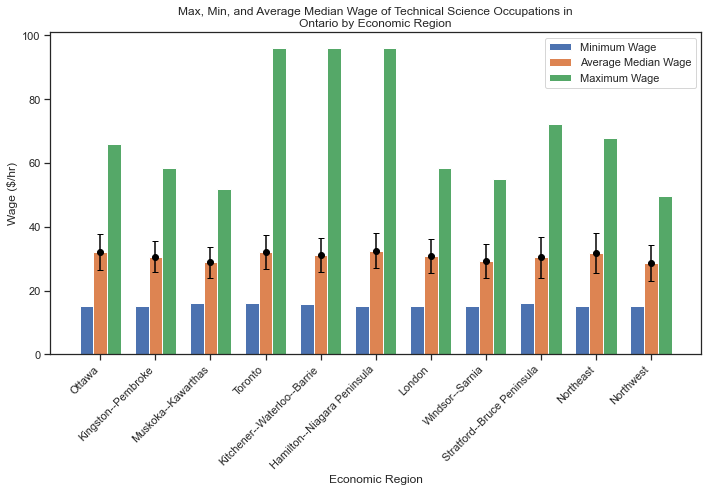

The ANOVA results for minimum wages of NOC major group by economic region in Ontario are F_onewayResult(statistic=0.796743349868663, pvalue=0.6319804761577644)
The ANOVA results for minimum wages of NOC major group by economic region in Ontario are F_onewayResult(statistic=0.9635777558398096, pvalue=0.4769788544874015)
The ANOVA results for minimum wages of NOC major group by economic region in Ontario are F_onewayResult(statistic=0.8793911833429731, pvalue=0.5536477054835411)


In [75]:
### Plots the Min, Max, and Average of the Median Wage by economic region

# Sets up labels
labels = summary_df['Economic region name']
# Sets up label locations on x-axis
x_axis = np.arange(len(labels))
# Sets up bar width
width = 0.25

# Sets up the chart
plt.figure(figsize=(10, 7))
plt.bar(x_axis - width, summary_df['Minimum Wage'], width, label='Minimum Wage')
plt.bar(x_axis, summary_df['Average Median Wage'], width, label='Average Median Wage')
plt.bar(x_axis + width, summary_df['Maximum Wage'], width, label='Maximum Wage')

# Formats the chart
plt.errorbar(x=x_axis, y=summary_df['Average Median Wage'], yerr=summary_df["Median Wage StDev"], fmt="o", capsize=3, color='black')
plt.ylabel("Wage ($/hr)")
plt.xlabel("Economic Region")
plt.title('\n'.join(wrap("Max, Min, and Average Median Wage of Technical Science Occupations in Ontario by Economic Region")))
plt.xticks(x_axis, labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

### Performs ANOVA test on the data to look for significant differences in the means of the max, min, and median wages in each economic region
## Makes groups for ANOVA analysis
# Sets up an empty list to hold groups
min_wage_groups = {}
max_wage_groups = {}
med_wage_groups = {}

# Iterates through Economic regions
for region in summary_df['Economic region code']:
    min_wage_groups[region] = wages_filtered[(wages_filtered['Economic region code'] == region) & (wages_filtered['Minimum wage']>0)]['Minimum wage']
    max_wage_groups[region] = wages_filtered[(wages_filtered['Economic region code'] == region) & (wages_filtered['Maximum wage']>0)]['Maximum wage']
    med_wage_groups[region] = wages_filtered[(wages_filtered['Economic region code'] == region) & (wages_filtered['Median wage']>0)]['Median wage']

## Performs ANOVA analysis to determine the significance of any differences in the means of the median, minimum, and maximum hourly wages in the different economic regions
min_sig = stats.f_oneway(*(min_wage_groups[region] for region in summary_df['Economic region code']))
max_sig = stats.f_oneway(*(max_wage_groups[region] for region in summary_df['Economic region code']))
med_sig = stats.f_oneway(*(med_wage_groups[region] for region in summary_df['Economic region code']))

# Prints the analysis
print(f"The ANOVA results for minimum wages of NOC major group by economic region in Ontario are {min_sig}")
print(f"The ANOVA results for minimum wages of NOC major group by economic region in Ontario are {max_sig}")
print(f"The ANOVA results for minimum wages of NOC major group by economic region in Ontario are {med_sig}")

# Employment Data

## Data manipulation and analysis

In [12]:
# Reads the employment data into a DataFrame
employment_df = pd.read_csv(employment, dtype={'REF_DATE': object, 'NOC Major Group': object, 'National Occupational Classification (NOC)': object, 'Economic region code': np.int64,
                                               'Economic region name': object, 'Number Employed (thousands)': np.float64})

# Filters data to keep NOC major group 22 - Technical occupations related to natural and applied sciences
employment_filtered = employment_df[employment_df["NOC Major Group"] == '22']

# Collects only the data for 2021, to match the census data, and resets the index
employment_filtered = employment_filtered[employment_filtered['REF_DATE'] == '2021'].reset_index(drop=True)

# Reads the census data into a DataFrame
census_df = pd.read_csv(census)

# Changes the Economic region code into an int
census_df["Economic region code"].astype(np.int64)

# Takes the total population from the census dataframe, and keeps the economic region to merge on
population = census_df[['Economic region code','Total income recipients']]

# Groups by Economic region code, sums the total population in each region, and divides by 1000 so scale is the same as employment numbers
population = population.groupby("Economic region code").sum().div(1000)

# Merges population into employment numbers on economic region code
employment_filtered = employment_filtered.merge(population, how='outer', on='Economic region code')

# Renames the Total population column
employment_filtered = employment_filtered.rename(columns={"Total income recipients":"Total income recipients (thousands)"})

# Adds a column for percentage of total workers employed in NOC 22
employment_filtered['Percent employed in NOC major group'] = (employment_filtered["Number Employed (thousands)"]/employment_filtered["Total income recipients (thousands)"])*100

# Shows the dataframe
employment_filtered

,REF_DATE,NOC Major Group,National Occupational Classification (NOC),Economic region code,Economic region name,Number Employed (thousands),Total income recipients (thousands),Percent employed in NOC major group
0,2021,22,Technical occupations related to natural and a...,3510,Ottawa,22.2,1113.270,1.994125
1,2021,22,Technical occupations related to natural and a...,3515,Kingston-Pembroke,8.2,389.735,2.103994
2,2021,22,Technical occupations related to natural and a...,3520,Muskoka-Kawarthas,2.5,331.720,0.753648
3,2021,22,Technical occupations related to natural and a...,3530,Toronto,98.9,5179.015,1.909630
4,2021,22,Technical occupations related to natural and a...,3540,Kitchener-Waterloo-Barrie,23.8,1122.615,2.120050
5,2021,22,Technical occupations related to natural and a...,3550,Hamilton-Niagara Peninsula,21.2,1192.315,1.778054
6,2021,22,Technical occupations related to natural and a...,3560,London,10.0,561.810,1.779961
7,2021,22,Technical occupations related to natural and a...,3570,Windsor-Sarnia,8.2,518.280,1.582156
8,2021,22,Technical occupations related to natural and a...,3580,Stratford-Bruce Peninsula,4.9,253.185,1.935344
9,2021,22,Technical occupations related to natural and a...,3590,Northeast,9.4,447.135,2.102273


## Data visualization, statistics, and write-up 
* Visualization and Statistics for Wage of Technical occupations related to natural and applied sciences by Economic Region

# Limitations
* Stats Canada has only one value per year for each economic region and occupation
    * This means that error cannot be calculated
* Job bands are wide, so many different individual jobs are included in this dataset but not stratified
    * There could be differences at the NOC minor group level that are not apparent at the NOC major group level
    * NOC major group is the only level represented in this dataset
* This data is from 2021
    * During COVID, many tech/ IT jobs moved to primarily woork from home, and many people moved from the big cities such as Toronto to smaller, cheaper cities to live in
    * This data documents wages of individuals living in each economic region
        * This does not have information on what companies they work for, where those companies are based, or whether they are working from home remotely
        * **Therefore, differences between economic regions may appear smaller based on this dataset than they would be in a comparison of employees working for companies based in each economic region**

# Proxies
* Number employed in occupations compared to the total population of a region is a proxy for the job availability / opportunities in that region
    * Assumes that the number of employees required is stable in a given location, and that there is turnover in employees
    * Job openings get filled, so the number employed stays consistent and opportunities open periodically
    * Comparing this number to the total population provides context regarding the number of openings for the specified positions required per capita in each location

# Analysis
* The number employed in the specified ocupations (NOC 22) per economic region correlates very strongly with the total number employed per economic region
    * R-value is 0.998, indicating a very strong correlation
    * This indicates that job opportunities in this sector per capita are very similar in each economic region
* The total employed population in Toronto is, however, much larger than in other economic regions and so is the number employed in technical scientific occupations

* **Overall, while there appears to be very little difference in job opportunities with regards to percentage of total population, there is a much higher number of opportunities in the most populated economic region - Toronto (which has >98 thousand employed in these occupations), which ostensibly comes with a much higher amount of competition for employment**
    * The next most populated economic regions, Ottawa, Kitchener, and Hamilton, have the next most opportunities, with 21-23 thousand employees in these occupations


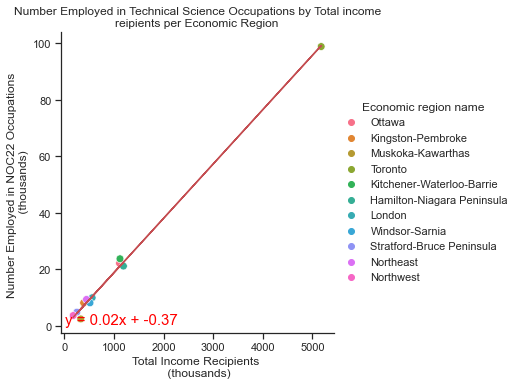

The R-value is 0.9981729930685272 for Number NOC 22 employees vs Total employees per economic region


In [45]:
## Plots the number of employees by total employed per economic region

# Sets up theme for seaborn
sns.set_style("ticks")

# Plots the data
sns.relplot(
    data=employment_filtered,
    x="Total income recipients (thousands)", y="Number Employed (thousands)", s=60, hue="Economic region name"
    ).set(title='\n'.join(wrap("Number Employed in Technical Science Occupations by Total income reipients per Economic Region")))

# Formats the plot
plt.ylabel("Number Employed in NOC22 Occupations \n (thousands)")
plt.xlabel('Total Income Recipients \n (thousands)')

# Performs a linear regression on the data
slope, intercept, r_val, p_val, std_err = stats.linregress(employment_filtered['Total income recipients (thousands)'], employment_filtered['Number Employed (thousands)'])

# Sets up regression values and line equation
regress_values = employment_filtered['Total income recipients (thousands)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plots the regression line and annotates it
plt.plot(employment_filtered['Total income recipients (thousands)'],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Shows the plot
plt.show()

# Prints the R-value
print(f"The R-value is {r_val} for Number NOC 22 employees vs Total employees per economic region")


## Extra Visualizations for Employment Data

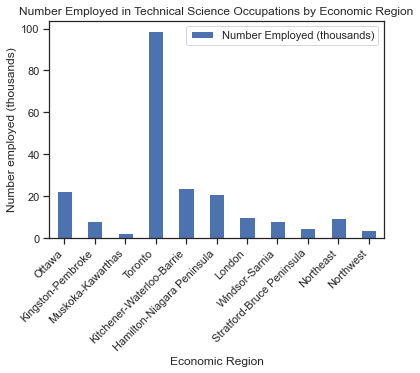

In [46]:
# Plots the number of NOC22 employees by economic region
employment_filtered.plot(kind='bar', x='Economic region name', y='Number Employed (thousands)')

# Formats the graph
plt.xticks(rotation=45, ha='right')
plt.xlabel("Economic Region")
plt.title('\n'.join(wrap("Number Employed in Technical Science Occupations by Economic Region")))
plt.ylabel("Number employed (thousands)")

# Shows the plot
plt.show()

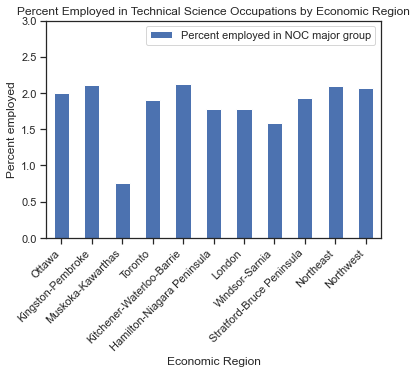

In [47]:
# Plots the percent of NOC22 employees by economic region
employment_filtered.plot(kind='bar', x='Economic region name', y='Percent employed in NOC major group')

# Formats the graph
plt.xticks(rotation=45, ha='right')
plt.xlabel("Economic Region")
plt.title('\n'.join(wrap("Percent Employed in Technical Science Occupations by Economic Region")))
plt.ylabel("Percent employed")
plt.ylim(0,3)

# Shows the plot
plt.show()

# Census Data

## Data manipulation and analysis

In [53]:
# Grabs the census dataframe loaded in earlier
census_df

# Takes location information for a summary dataframe and copies to a new dataframe
summary_census = census_df[['Economic region code', 'Economic region name', 'Census division code',
       'Census division name', 'Census subdivision code','Census subdivision name','Population density (people/square km)']].copy()

# Calculates summary column for percentage of people living >1 person per room
summary_census['Percent of households with >1 person per room'] = (census_df['>1 per room']/census_df['Total households by #/room'])*100

# Calculates summary column for percent of people living in unsuitable housing
summary_census['Percent living in unsuitable housing'] = (census_df['Unsuitable housing']/census_df['Total households by housing suitability'])*100

# Calculates summary column for percent of people spending >30% of income on shelter
summary_census['Percent spending >30% of income on shelter'] = ((census_df['>=30 percent of income spent on shelter']+census_df['30 - <100 percent of income spent on shelter'])/census_df['Total owned and rented households >0 income'])*100

# Calculates columns for percentages of people with different commute times
summary_census['Percent commute <15 min'] = (census_df['Commute <15 min']/census_df['Total commuting duration'])*100
summary_census['Percent commute 15-29 min'] = (census_df['Commute 15-29 min']/census_df['Total commuting duration'])*100
summary_census['Percent commute 30-44 min'] = (census_df['Commute 30-44 min']/census_df['Total commuting duration'])*100
summary_census['Percent commute 45-59 min'] = (census_df['Commute 45-59 min']/census_df['Total commuting duration'])*100
summary_census['Percent commute >=60'] = (census_df['Commute >=60 min']/census_df['Total commuting duration'])*100

# Shows the dataframe
summary_census.head()

,Economic region code,Economic region name,Census division code,Census division name,Census subdivision code,Census subdivision name,Population density (people/square km),Percent of households with >1 person per room,Percent living in unsuitable housing,Percent spending >30% of income on shelter,Percent commute <15 min,Percent commute 15-29 min,Percent commute 30-44 min,Percent commute 45-59 min,Percent commute >=60
0,3510,Ottawa,3501,"Stormont, Dundas and Glengarry, United countie...",3501005,"South Glengarry, Township (TP)",22.0,0.644567,2.486188,24.515504,30.030334,41.051567,16.683519,5.055612,7.280081
1,3510,Ottawa,3501,"Stormont, Dundas and Glengarry, United countie...",3501007,"Akwesasne (Part) 59, Indian reserve (IRI)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3510,Ottawa,3501,"Stormont, Dundas and Glengarry, United countie...",3501011,"South Stormont, Township (TP)",30.3,0.369344,1.477378,20.302172,24.591652,48.275862,14.065336,4.990926,7.894737
3,3510,Ottawa,3501,"Stormont, Dundas and Glengarry, United countie...",3501012,"Cornwall, City (CY)",777.9,1.355774,4.488079,42.974431,59.745223,26.401274,5.796178,2.197452,5.891720
4,3510,Ottawa,3501,"Stormont, Dundas and Glengarry, United countie...",3501020,"South Dundas, Municipality (MU)",21.2,1.075269,3.118280,26.837416,30.038511,24.903723,19.512195,11.938383,13.607189


In [71]:
# Groups by Economic region, finds the averages, and removes other location codes/ names, and outputs a dataframe with average data
ER_summary_mean = summary_census.groupby('Economic region name')[['Population density (people/square km)','Percent of households with >1 person per room','Percent living in unsuitable housing','Percent spending >30% of income on shelter', 'Percent commute <15 min',
       'Percent commute 15-29 min', 'Percent commute 30-44 min','Percent commute 45-59 min', 'Percent commute >=60']].mean()

# Groups by Economic region, finds the averages, and removes other location codes/ names, and outputs a dataframe with std deviation data
ER_summary_stdev = summary_census.groupby('Economic region name')[['Population density (people/square km)','Percent of households with >1 person per room','Percent living in unsuitable housing','Percent spending >30% of income on shelter', 'Percent commute <15 min',
       'Percent commute 15-29 min', 'Percent commute 30-44 min','Percent commute 45-59 min', 'Percent commute >=60']].std()

,Population density (people/square km),Percent of households with >1 person per room,Percent living in unsuitable housing,Percent spending >30% of income on shelter,Percent commute <15 min,Percent commute 15-29 min,Percent commute 30-44 min,Percent commute 45-59 min,Percent commute >=60
Economic region name,,,,,,,,,
Hamilton-Niagara Peninsula,404.072914,0.589664,2.943186,7.099636,13.529637,9.318974,5.244012,3.028714,2.680839
Kingston-Pembroke,221.159786,0.507005,1.688629,8.477693,12.214524,9.964627,8.197044,5.191795,7.018287
Kitchener-Waterloo-Barrie,606.280514,0.849671,2.034061,8.872280,14.589841,9.068009,5.093204,4.667779,7.110018
London,434.070162,0.853349,3.661062,7.532858,8.769618,8.223714,7.473841,4.165642,2.401423
Muskoka-Kawarthas,274.332539,2.389629,3.346877,6.143657,14.483324,9.058627,5.861387,4.453059,4.339334
Northeast,102.116526,3.115748,5.760025,11.376876,23.490446,15.252232,13.957362,7.330547,8.178237
Northwest,119.048627,11.909590,15.072343,9.402098,23.663775,13.252025,11.493299,5.674537,7.749601
Ottawa,380.014293,0.412035,1.029053,8.851393,12.601098,8.993944,8.397447,4.869518,3.770480
Stratford-Bruce Peninsula,307.903604,0.991964,2.442775,6.341014,11.900561,7.956146,5.178652,2.094595,4.116127


## Data visualization, statistics, and write-up 

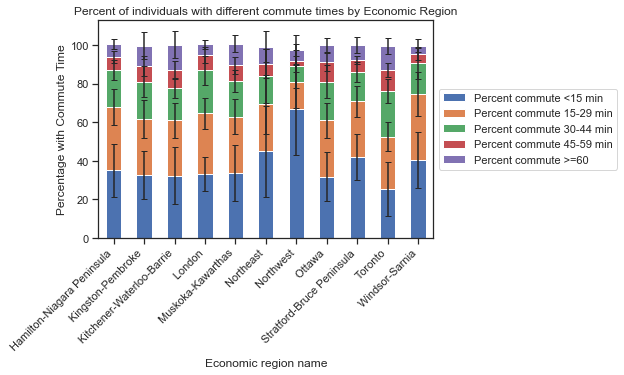

In [74]:
## Plots a stacked bar chart of commute times at the economic region level
ER_summary_mean[['Percent commute <15 min','Percent commute 15-29 min', 'Percent commute 30-44 min','Percent commute 45-59 min', 'Percent commute >=60']].plot(kind='bar', stacked=True, yerr=ER_summary_stdev[['Percent commute <15 min','Percent commute 15-29 min', 'Percent commute 30-44 min','Percent commute 45-59 min', 'Percent commute >=60']], capsize=3)

# Formats the chart
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Percentage with Commute Time")
plt.title("Percent of individuals with different commute times by Economic Region")
plt.xticks(rotation=45, ha='right')

# Shows the plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

In [ ]:
## Plots a stacked bar chart of commute times at the economic region level
# Sets up 

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Teams")
plt.ylabel("Score")
plt.legend(["Round 1", "Round 2", "Round 3", "Round 4"])
plt.title("Scores by Teams in 4 Rounds")
plt.show()

# Data Extensibility

### Overall Extensibility
* This analysis is specifically for NOC 22, which is technical occupations relating to natural ana applied sciences
* However, the datasets here have information on all NOC major groups
* **This means that these analyses and charts can easily be generated for any other NOC major group of interest, and a comparison of different NOCs would be interesting in future though out of scope for this project**

# Employment Numbers
* This dataset has numbers for every year from 2006 - 2022
* **The analysis of employment numbers for specific NOC groups could therefore be calculated over time, to determine the trajectory of job opportunities, though this is currently out of scope for this project**
